<a href="https://colab.research.google.com/github/duhajarrar/TelecomMIT/blob/main/%20Draft1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#duha
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
###nibaaalll
#hamza
#raha
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
import plotly.express as px
import tensorflow as tf
from imblearn.over_sampling import SMOTE
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier


# Read Data

In [7]:
trainingData = pd.read_csv("drive/MyDrive/telecom.csv")
trainingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [8]:
trainingData.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Label Encoding

In [9]:

label_encoder = preprocessing.LabelEncoder()
trainingData['state'] = label_encoder.fit_transform(trainingData['state'])
trainingData['international plan'] = label_encoder.fit_transform(trainingData['international plan'])
trainingData['voice mail plan'] = label_encoder.fit_transform(trainingData['voice mail plan'])
trainingData['churn'] = label_encoder.fit_transform(trainingData['churn'])
trainingData['phone number'] = label_encoder.fit_transform(trainingData['phone number'])


# Rename Columns

In [10]:
for i in range(len(trainingData.columns)):
  trainingData.rename(columns={trainingData.columns[i]: trainingData.columns[i].replace(r' ','_')}, inplace=True)


# Find the percent of churn customer to non-churn customer

483
Churn Percentage = 14.491449144914492


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



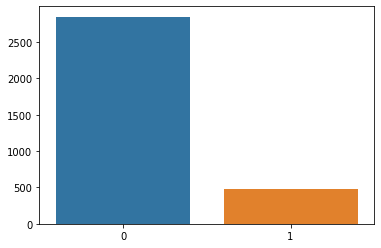

In [11]:
y = trainingData['churn'].value_counts()
sns.barplot(y.index, y.values)
y_True = trainingData["churn"][trainingData["churn"] == True]
print(y_True.shape[0])
print ("Churn Percentage = "+str( (y_True.shape[0] / trainingData["churn"].shape[0]) * 100 ))

In [12]:
trainingData.describe()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
count,3333.000000,3333.000000,3333.000000,3333.00000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,26.059406,101.064806,437.182418,1666.00000,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,14.824911,39.822106,42.371290,962.29855,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,0.000000,1.000000,408.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,74.000000,408.000000,833.00000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.000000,101.000000,415.000000,1666.00000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.000000,127.000000,510.000000,2499.00000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,50.000000,243.000000,510.000000,3332.00000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [13]:
col=trainingData.columns
print(col)

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')


In [14]:
churn=trainingData[trainingData['churn']==True]
non_churn=trainingData[trainingData['churn']==False]

international_plan
0.2836438923395445
0.06526315789473684


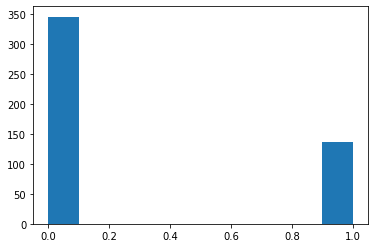

In [15]:

print(col[4])
hist(trainingData[col[4]],weights=trainingData['churn'])
international_plan_Ch=(churn['international_plan']).sum()/churn.shape[0]
international_plan_NonCh=(non_churn['international_plan']).sum()/non_churn.shape[0]
print(international_plan_Ch)
print(international_plan_NonCh)

area_code
437.8178053830228
437.07473684210527


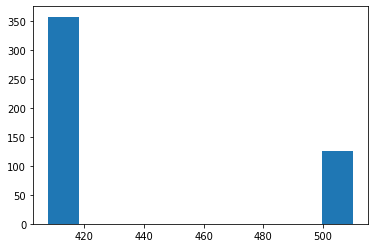

In [16]:

print(col[2])
hist(trainingData[col[2]],weights=trainingData['churn'])
international_plan_Ch=(churn['area_code']).sum()/churn.shape[0]
international_plan_NonCh=(non_churn['area_code']).sum()/non_churn.shape[0]
print(international_plan_Ch)
print(international_plan_NonCh)

**NOTE:** here from above avg for churn and non-churn data we can say "area_code" not important

total_day_minutes
206.91407867494823
175.1757543859649


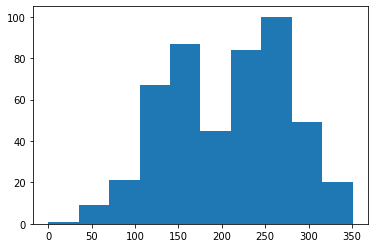

In [17]:

print(col[7])
hist(trainingData[col[7]],weights=trainingData['churn'])
international_plan_Ch=(churn['total_day_minutes']).sum()/churn.shape[0]
international_plan_NonCh=(non_churn['total_day_minutes']).sum()/non_churn.shape[0]
print(international_plan_Ch)
print(international_plan_NonCh)

total_day_charge
35.17592132505176
29.780421052631578


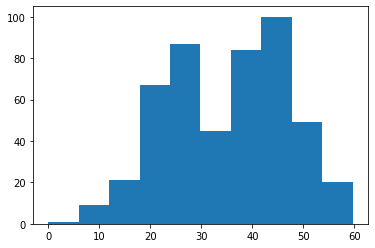

In [18]:

print(col[9])
hist(trainingData[col[9]],weights=trainingData['churn'])
international_plan_Ch=(churn['total_day_charge']).sum()/churn.shape[0]
international_plan_NonCh=(non_churn['total_day_charge']).sum()/non_churn.shape[0]
print(international_plan_Ch)
print(international_plan_NonCh)

customer_service_calls
2.229813664596273
1.4498245614035088


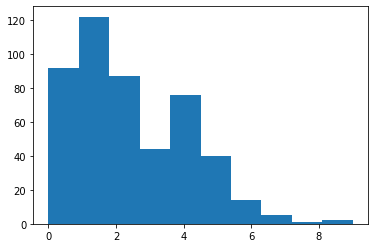

In [19]:

print(col[19])
hist(trainingData[col[19]],weights=trainingData['churn'])
international_plan_Ch=(churn['customer_service_calls']).sum()/churn.shape[0]
international_plan_NonCh=(non_churn['customer_service_calls']).sum()/non_churn.shape[0]
print(international_plan_Ch)
print(international_plan_NonCh)

#Churn percentage


In [20]:

fig = px.pie(trainingData, names='churn', title='churn',width=400, height=400)
fig.show()

**IMPORTANT NOTE :So we need to resample the data**

# Find Correlation 

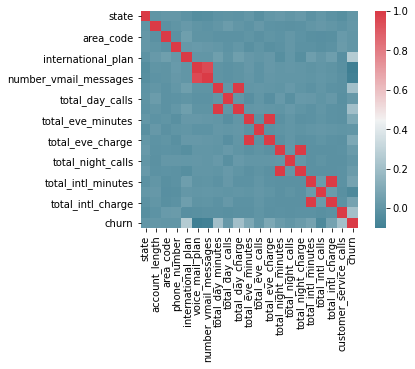

In [21]:

corr = trainingData.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

In [22]:
corr['churn']

state                     0.007780
account_length            0.016541
area_code                 0.006174
phone_number              0.005626
international_plan        0.259852
voice_mail_plan          -0.102148
number_vmail_messages    -0.089728
total_day_minutes         0.205151
total_day_calls           0.018459
total_day_charge          0.205151
total_eve_minutes         0.092796
total_eve_calls           0.009233
total_eve_charge          0.092786
total_night_minutes       0.035493
total_night_calls         0.006141
total_night_charge        0.035496
total_intl_minutes        0.068239
total_intl_calls         -0.052844
total_intl_charge         0.068259
customer_service_calls    0.208750
churn                     1.000000
Name: churn, dtype: float64

# Find Features Selection

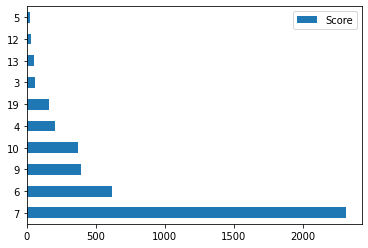

In [23]:

a=trainingData.drop(columns='churn')
b=trainingData['churn']
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(a,b)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(a.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.nlargest(10,'Score').plot(kind='barh')  #print 10 best features
plt.show()

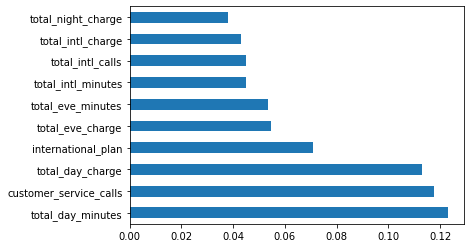

total_day_minutes         0.123147
customer_service_calls    0.117748
total_day_charge          0.113070
international_plan        0.071015
total_eve_charge          0.054473
total_eve_minutes         0.053471
total_intl_minutes        0.045132
total_intl_calls          0.044863
total_intl_charge         0.043007
total_night_charge        0.037920
total_night_minutes       0.036998
total_day_calls           0.035222
account_length            0.033557
total_night_calls         0.032918
total_eve_calls           0.032729
phone_number              0.032507
state                     0.031638
area_code                 0.022526
voice_mail_plan           0.020527
number_vmail_messages     0.017531
dtype: float64


In [24]:
model = ExtraTreesClassifier()
model.fit(a,b)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=a.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()
n=feat_importances.nlargest(20)
print(n)

# DF with Selected feature 

In [25]:
'''DataFeatureSelection=trainingData.drop(columns={'total night charge','total day calls','account length','total night calls','phone number','state','total eve calls','area code','voice mail plan','number vmail messages'})
print(DataFeatureSelection.shape)
DataFeatureSelection.head()'''

"DataFeatureSelection=trainingData.drop(columns={'total night charge','total day calls','account length','total night calls','phone number','state','total eve calls','area code','voice mail plan','number vmail messages'})\nprint(DataFeatureSelection.shape)\nDataFeatureSelection.head()"

In [26]:
DataFeatureSelection=trainingData.drop(columns={'total_night_charge','total_day_calls','account_length','total_night_calls','phone_number','state','total_eve_calls','area_code','voice_mail_plan','number_vmail_messages'})
print(DataFeatureSelection.shape)
DataFeatureSelection.head()

(3333, 11)


,international_plan,total_day_minutes,total_day_charge,total_eve_minutes,total_eve_charge,total_night_minutes,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,265.1,45.07,197.4,16.78,244.7,10.0,3,2.70,1,0
1,0,161.6,27.47,195.5,16.62,254.4,13.7,3,3.70,1,0
2,0,243.4,41.38,121.2,10.30,162.6,12.2,5,3.29,0,0
3,1,299.4,50.90,61.9,5.26,196.9,6.6,7,1.78,2,0
4,1,166.7,28.34,148.3,12.61,186.9,10.1,3,2.73,3,0


# Resample Data using SMOTE

In [27]:

# Separate input features and target
y = trainingData['churn']
x = trainingData.drop({'churn','phone_number'}, axis=1)


scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)

# setting up testing and training sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27, ratio=1.0)
print(x_train.shape[0], y_train.shape[0])
x_train, y_train = sm.fit_sample(x_train, y_train)
print(x_train.shape[0], y_train.shape[0])
z=0
for i in y_train:
  if i ==1:
    z+=1
print(z)


2499 2499
4242 4242
2121


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [28]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedShuffleSplit, GridSearchCV
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size = .33, stratify = y, random_state =500)

positive_weight = sum(ytrain == 0) / sum(ytrain == 1)  # size to repeat y == 1

estimator = RandomForestClassifier(random_state=0, class_weight = {0 : 1, 1 : positive_weight}, warm_start = True, n_jobs = 70)
estimator.fit(Xtrain,ytrain)
y1=estimator.predict( Xtest)
print(accuracy_score(ytest,y1))

0.9472727272727273


In [29]:

estimator = GradientBoostingClassifier(random_state=0, warm_start = True)
estimator.fit(Xtrain,ytrain)
y1=estimator.predict( Xtest)
print(accuracy_score(ytest,y1))

0.9509090909090909


# Linear Regression

Linear Regression Success Rate : 85.01%


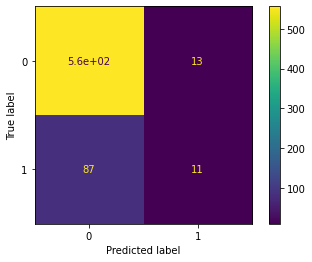

accuracy_score=  85.00749625187406
pr_score=  85.00749625187406
recall_score=  11.224489795918368
f1_score=  18.0327868852459


In [30]:

x = trainingData[['state', 'account_length', 'area_code', 'phone_number','international_plan', 'voice_mail_plan', 'number_vmail_messages','total_day_minutes', 'total_day_calls', 'total_day_charge','total_eve_minutes', 'total_eve_calls', 'total_eve_charge','total_night_minutes', 'total_night_calls', 'total_night_charge','total_intl_minutes', 'total_intl_calls', 'total_intl_charge','customer_service_calls']]
y = trainingData['churn']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)
lr=LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)
p1=lr.predict(x_test)
s1=accuracy_score(y_test,p1)
linearRegression=s1;
print("Linear Regression Success Rate :", "{:.2f}%".format(100*s1))
plot_confusion_matrix(lr, x_test, y_test)
plt.show()
smote_pred=p1
acc_test_smote= accuracy_score(y_test, smote_pred)*100
acc_pr_smote = precision_score(y_test, smote_pred, average='micro')*100
acc_recall_smote= recall_score(y_test, smote_pred)*100
acc_f1_smote= f1_score(y_test, smote_pred)*100


print('accuracy_score= ', acc_test_smote)
print('pr_score= ', acc_pr_smote)
print('recall_score= ', acc_recall_smote)
print('f1_score= ', acc_f1_smote)

# Gradient Boosting Classifier

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
ACC_test_svm = cross_val_score(GradientBoostingClassifier(),x,y,cv=StratifiedKFold(n_splits=5, shuffle=True))
print(ACC_test_svm)
ACC_test_svm_mean = np.mean(ACC_test_svm)
print(ACC_test_svm_mean)


[0.95502249 0.93553223 0.95052474 0.96096096 0.94594595]
0.9495972734353544


Gradient Booster Classifier Success Rate : 94.60%


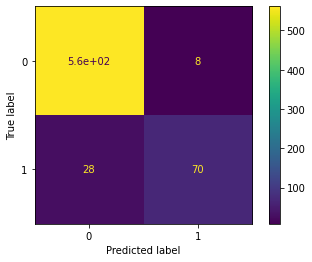

accuracy_score=  94.60269865067467
pr_score=  94.60269865067467
recall_score=  71.42857142857143
f1_score=  79.54545454545455


In [44]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
p2=gbc.predict(x_test)
s2=accuracy_score(y_test,p2)
gradientBossterClassifier=s2
print("Gradient Booster Classifier Success Rate :", "{:.2f}%".format(100*s2))
plot_confusion_matrix(gbc, x_test, y_test)
plt.show()
smote_pred=p2
acc_test_smote= accuracy_score(y_test, smote_pred)*100
acc_pr_smote = precision_score(y_test, smote_pred, average='micro')*100
acc_recall_smote= recall_score(y_test, smote_pred)*100
acc_f1_smote= f1_score(y_test, smote_pred)*100


print('accuracy_score= ', acc_test_smote)
print('pr_score= ', acc_pr_smote)
print('recall_score= ', acc_recall_smote)
print('f1_score= ', acc_f1_smote)

# Random Forest Classifier

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
ACC_test_rf4 = cross_val_score(RandomForestClassifier(),x,y,cv=StratifiedKFold(n_splits=5, shuffle=True))
print(ACC_test_rf4)
ACC_test_rf_mean = np.mean(ACC_test_rf4)
print(ACC_test_rf_mean)

[0.95202399 0.96101949 0.94752624 0.94594595 0.95195195]
0.9516935226080653


In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
smote = RandomForestClassifier(n_estimators=20).fit(x_train, y_train)
smote_pred = smote.predict(x_test)
acc_test_smote= accuracy_score(y_test, smote_pred)*100
acc_pr_smote = precision_score(y_test, smote_pred, average='micro')*100
acc_recall_smote= recall_score(y_test, smote_pred)*100
acc_f1_smote= f1_score(y_test, smote_pred)*100


print('accuracy_score= ', acc_test_smote)
print('pr_score= ', acc_pr_smote)
print('recall_score= ', acc_recall_smote)
print('f1_score= ', acc_f1_smote)

accuracy_score=  94.15292353823088
pr_score=  94.15292353823088
recall_score=  67.3469387755102
f1_score=  77.19298245614034


accuracy_score=  94.8441247002398
pr_score=  94.8441247002398
recall_score=  76.19047619047619
f1_score=  78.81773399014779

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)
rfc.fit(x_train,y_train)
smote_pred=rfc.predict(x_test)
#s3=accuracy_score(y_test,p3)
acc_test_smote= accuracy_score(y_test, smote_pred)*100
acc_pr_smote = precision_score(y_test, smote_pred, average='micro')*100
acc_recall_smote= recall_score(y_test, smote_pred)*100
acc_f1_smote= f1_score(y_test, smote_pred)*100


print('accuracy_score= ', acc_test_smote)
print('pr_score= ', acc_pr_smote)
print('recall_score= ', acc_recall_smote)
print('f1_score= ', acc_f1_smote)
#randomForestClassifier=s3;
#print("Random Forest Classifier Success Rate :", "{:.2f}%".format(100*s3))

#plot_confusion_matrix(rfc, x_test, y_test)
#plt.show()

accuracy_score=  94.75262368815592
pr_score=  94.75262368815592
recall_score=  71.42857142857143
f1_score=  80.0


# Support Vector Machine

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
ACC_test_svm = cross_val_score(SVC(),x,y,cv=StratifiedKFold(n_splits=5, shuffle=True))
print(ACC_test_svm)
ACC_test_svm_mean = np.mean(ACC_test_svm)
print(ACC_test_svm_mean)

[0.85457271 0.85457271 0.85457271 0.85585586 0.85585586]
0.8550859705282494


Support Vector Machine Success Rate : 85.31%


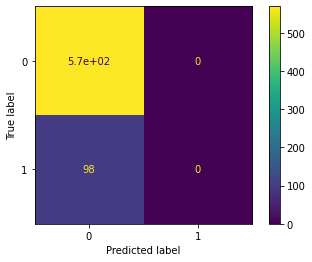

accuracy_score=  85.30734632683658
pr_score=  85.30734632683658
recall_score=  0.0
f1_score=  0.0


In [45]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
p4=svm.predict(x_test)
s4=accuracy_score(y_test,p4)
supportVectorMachine=s4;
print("Support Vector Machine Success Rate :", "{:.2f}%".format(100*s4))
plot_confusion_matrix(svm, x_test, y_test)
plt.show()
smote_pred=p4
acc_test_smote= accuracy_score(y_test, smote_pred)*100
acc_pr_smote = precision_score(y_test, smote_pred, average='micro')*100
acc_recall_smote= recall_score(y_test, smote_pred)*100
acc_f1_smote= f1_score(y_test, smote_pred)*100


print('accuracy_score= ', acc_test_smote)
print('pr_score= ', acc_pr_smote)
print('recall_score= ', acc_recall_smote)
print('f1_score= ', acc_f1_smote)

# K Nearest Neighbors

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
ACC_test_svm = cross_val_score(KNeighborsClassifier(),x,y,cv=StratifiedKFold(n_splits=5, shuffle=True))
print(ACC_test_svm)
ACC_test_svm_mean = np.mean(ACC_test_svm)
print(ACC_test_svm_mean)

[0.85907046 0.86656672 0.86056972 0.86186186 0.86486486]
0.8625867246556902


accuracy_score=  77.81109445277362
pr_score=  77.81109445277362
recall_score=  26.53061224489796
f1_score=  25.999999999999996
******
accuracy_score=  84.70764617691154
pr_score=  84.70764617691154
recall_score=  12.244897959183673
f1_score=  19.047619047619047
******
accuracy_score=  83.95802098950524
pr_score=  83.95802098950524
recall_score=  17.346938775510203
f1_score=  24.11347517730496
******
accuracy_score=  85.90704647676162
pr_score=  85.90704647676162
recall_score=  9.183673469387756
f1_score=  16.071428571428573
******
accuracy_score=  85.90704647676162
pr_score=  85.90704647676162
recall_score=  14.285714285714285
f1_score=  22.950819672131143
******
accuracy_score=  85.90704647676162
pr_score=  85.90704647676162
recall_score=  7.142857142857142
f1_score=  12.962962962962962
******
accuracy_score=  86.05697151424287
pr_score=  86.05697151424287
recall_score=  9.183673469387756
f1_score=  16.216216216216218
******
accuracy_score=  86.20689655172413
pr_score=  86.20689655172

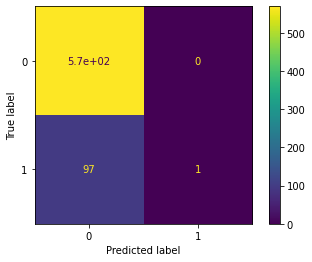

In [51]:
from sklearn.neighbors import KNeighborsClassifier
scorelist=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    p5=knn.predict(x_test)
    s5=accuracy_score(y_test,p5)
    smote_pred=p5
    acc_test_smote= accuracy_score(y_test, smote_pred)*100
    acc_pr_smote = precision_score(y_test, smote_pred, average='micro')*100
    acc_recall_smote= recall_score(y_test, smote_pred)*100
    acc_f1_smote= f1_score(y_test, smote_pred)*100
    print('accuracy_score= ', acc_test_smote)
    print('pr_score= ', acc_pr_smote)
    print('recall_score= ', acc_recall_smote)
    print('f1_score= ', acc_f1_smote)
    print("******")
    scorelist.append(round(100*s5, 2))
p1=sum(scorelist)/len(scorelist)
print("K Nearest Neighbors Top 5 Success Rates:")
print(sorted(scorelist,reverse=True)[:5])
kNearestNeighbours=max(scorelist)
plot_confusion_matrix(knn, x_test, y_test)
plt.show()
smote_pred=p1


# Decision Tree Classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier
ACC_test_svm = cross_val_score( DecisionTreeClassifier(),x,y,cv=StratifiedKFold(n_splits=5, shuffle=True))
print(ACC_test_svm)
ACC_test_svm_mean = np.mean(ACC_test_svm)
print(ACC_test_svm_mean)

[0.92953523 0.92353823 0.90854573 0.92192192 0.8993994 ]
0.9165881023452238


accuracy_score=  83.95802098950524
pr_score=  83.95802098950524
recall_score=  26.53061224489796
f1_score=  32.70440251572327
******
accuracy_score=  83.95802098950524
pr_score=  83.95802098950524
recall_score=  26.53061224489796
f1_score=  32.70440251572327
******
accuracy_score=  83.95802098950524
pr_score=  83.95802098950524
recall_score=  26.53061224489796
f1_score=  32.70440251572327
******
accuracy_score=  84.70764617691154
pr_score=  84.70764617691154
recall_score=  31.63265306122449
f1_score=  37.80487804878049
******
accuracy_score=  85.90704647676162
pr_score=  85.90704647676162
recall_score=  39.795918367346935
f1_score=  45.348837209302324
******
accuracy_score=  86.65667166416792
pr_score=  86.65667166416792
recall_score=  76.53061224489795
f1_score=  62.76150627615063
******
accuracy_score=  88.45577211394303
pr_score=  88.45577211394303
recall_score=  66.3265306122449
f1_score=  62.80193236714976
******
accuracy_score=  92.05397301349325
pr_score=  92.05397301349325
reca

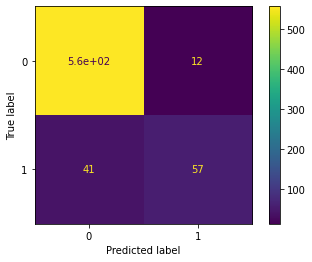

In [49]:
from sklearn.tree import DecisionTreeClassifier
list1 = []
for leaves in range(2,10):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    smote_pred=y_pred
    acc_test_smote= accuracy_score(y_test, smote_pred)*100
    acc_pr_smote = precision_score(y_test, smote_pred, average='micro')*100
    acc_recall_smote= recall_score(y_test, smote_pred)*100
    acc_f1_smote= f1_score(y_test, smote_pred)*100
    print('accuracy_score= ', acc_test_smote)
    print('pr_score= ', acc_pr_smote)
    print('recall_score= ', acc_recall_smote)
    print('f1_score= ', acc_f1_smote)
    print("******")
    list1.append(accuracy_score(y_test,y_pred)*100)
print("Decision Tree Classifier Top 5 Success Rates:")
print([round(i, 2) for i in sorted(list1, reverse=True)[:5]])
decisionTreeClassifier=max(list1)
plot_confusion_matrix(classifier, x_test, y_test)
plt.show()


In [42]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(x_train,y_train)
ACC_train_nb = model_nb.score(x_train,y_train)
ACC_test_nb = model_nb.score(x_test,y_test)
print(ACC_train_nb*100)
print(ACC_test_nb*100)

87.47186796699175
84.25787106446776


# Our First Decision

From previous results on **Recall , F1 score and precision** it's very bad in all classifiers **except** Random Forest Classifier and Gradient Boosting Classifier
So let use improve **Random Forest Classifier** & **Gradient Boosting Classifier** scores

**I will continue at ==>> " Draft1.ipynb" notebook**


# Final Results:

In [43]:
#print("Deep Neural Network : ","{:.2f}%".format(100*deepNeuralNetwork))
print("Linear Regression : ","{:.2f}%".format(linearRegression*100))
print("Gradient Booster Classifier :", "{:.2f}%".format(100*gradientBossterClassifier))
#print("Random Forest Classifier : ","{:.2f}%".format(randomForestClassifier*100))
print("Support Vector Machine : ","{:.2f}%".format(supportVectorMachine*100))
print("K Nearest Neighbours : ","{:.2f}%".format(kNearestNeighbours))
print("Decision Tree Classifier : ","{:.2f}%".format(decisionTreeClassifier))

Linear Regression :  85.01%
Gradient Booster Classifier : 94.60%
Support Vector Machine :  85.31%
K Nearest Neighbours :  86.66%
Decision Tree Classifier :  92.05%
